In [1]:
import numpy as np
from adfp import Variable
import adfp.functions as F
import adfp.model.layers as L

import matplotlib.pyplot as plt

In [2]:
 np.random.seed(0)
 x = np.sort(np.random.rand(100, 1), axis=0)
 y = 5 + 2 * x + np.random.rand(100, 1)
 x, y = Variable(x), Variable(y)

In [3]:
W = Variable(np.zeros((1, 1)))
b = Variable(np.zeros(1))


def predict(x):
    y = x.dot(W) + b
    return y

In [4]:
def mse_simple(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)

In [5]:
lr = 0.1
iters = 100

for i in range(iters):
    y_pred = predict(x)
    loss = mse_simple(y, y_pred)

    W.cleargrad()
    b.cleargrad()
    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data
    
    print(W, b, loss)

variable([[0.64225628]]) variable([1.29473389]) variable(42.2547740655632)
variable([[1.12269431]]) variable([2.26979003]) variable(23.955616340482283)
variable([[1.48146679]]) variable([3.00440532]) variable(13.604544920739368)
variable([[1.7487713]]) variable([3.55817247]) variable(7.749121753989504)
variable([[1.94731839]]) variable([3.9759102]) variable(4.436563126816414)
variable([[2.09418776]]) variable([4.29132602]) variable(2.562326453969445)
variable([[2.20222423]]) variable([4.52977089]) variable(1.5016550581990726)
variable([[2.28108774]]) variable([4.71031099]) variable(0.9011708995623089)
variable([[2.33804287]]) variable([4.84728583]) variable(0.5609943334092466)
variable([[2.37855275]]) variable([4.9514801]) variable(0.3680681665159424)
variable([[2.40672567]]) variable([5.03100495]) variable(0.25844411469172895)
variable([[2.42565095]]) variable([5.09196083]) variable(0.19595110194460935)
variable([[2.43765163]]) variable([5.13893599]) variable(0.16012952929214858)
vari

Text(0, 0.5, 'y axis')

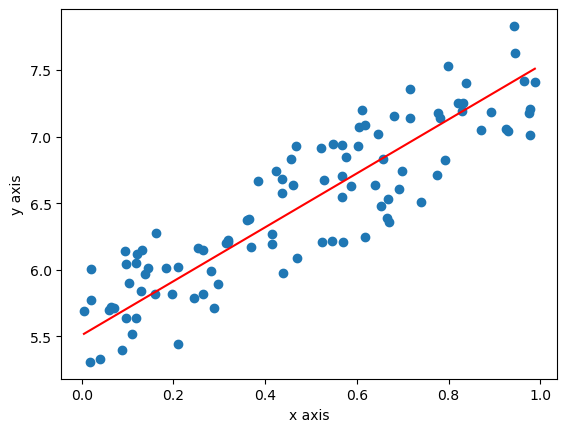

In [6]:
y_pred = predict(x)
plt.plot(x.data, y_pred.data, color="red")
plt.scatter(x.data, y.data)
plt.xlabel("x axis")
plt.ylabel("y axis")

In [7]:
from adfp import plot_dot_graph

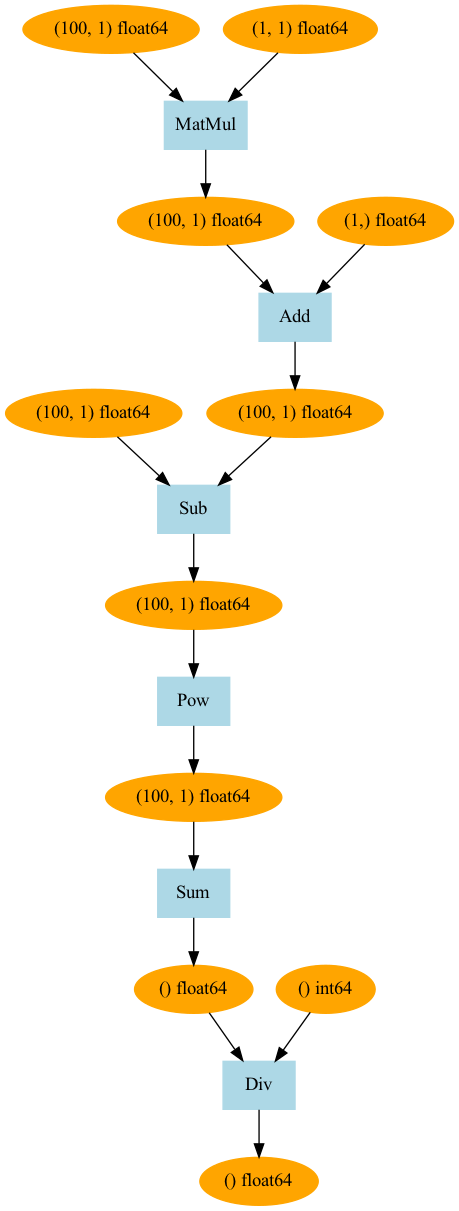

In [8]:
plot_dot_graph(loss)

In [9]:
from adfp.model.evaluation import mean_square_error

In [10]:
np.random.seed(0)
x = np.sort(np.random.rand(100, 1), axis=0)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

# I, H, O = 1, 10, 1
# W1 = Variable(0.01 * np.random.randn(I, H))
# b1 = Variable(np.zeros(H))
# W2 = Variable(0.01 * np.random.randn(H, O))
# b2 = Variable(np.zeros(O))
l1 = L.Linear(10)
l2 = L.Linear(1)


def predict(x):
    # y = F.linear(x, W1, b1)
    # y = F.sigmoid(y)
    # y = F.linear(y, W2, b2)
    y = l1(x)
    y = F.sigmoid(y)
    y = l2(y)
    return y


lr = 0.2
iters = 10000

for i in range(iters):
    y_pred = predict(x)
    loss = mean_square_error(y, y_pred)

    # W1.cleargrad()
    # b1.cleargrad()
    # W2.cleargrad()
    # b2.cleargrad()
    l1.cleargrads()
    l2.cleargrads()
    loss.backward()

    # W1.data -= lr * W1.grad.data
    # b1.data -= lr * b1.grad.data
    # W2.data -= lr * W2.grad.data
    # b2.data -= lr * b2.grad.data
    for l in [l1, l2]:
        for p in l.params:
            p.data -= lr * p.grad.data

    if i % 1000 == 0:
        print(f'iter: {i}, loss: {loss}')


iter: 0, loss: variable(0.8624304088340174)
iter: 1000, loss: variable(0.25056674051604866)
iter: 2000, loss: variable(0.24619656136480506)
iter: 3000, loss: variable(0.2345898101241534)
iter: 4000, loss: variable(0.196460279311692)
iter: 5000, loss: variable(0.1083026463805378)
iter: 6000, loss: variable(0.07760076632156218)
iter: 7000, loss: variable(0.07552379032394878)
iter: 8000, loss: variable(0.09242522328051522)
iter: 9000, loss: variable(0.07470967685608701)


Text(0, 0.5, 'y axis')

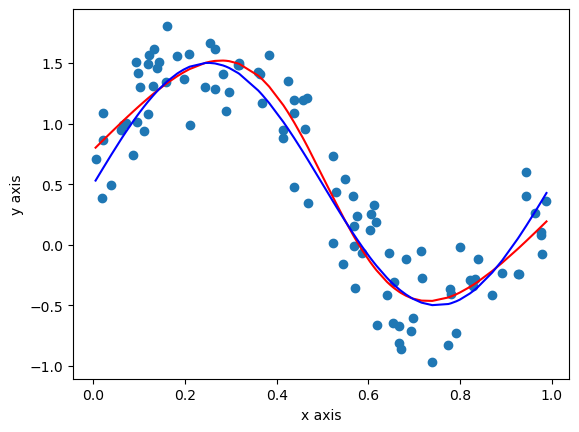

In [11]:
y_pred = predict(x)
plt.plot(x, y_pred.data, color='red')
plt.plot(x, np.sin(2 * np.pi * x) + 0.5, color='blue')
plt.scatter(x, y)
plt.xlabel('x axis')
plt.ylabel('y axis')

In [12]:
from adfp.model.models import TwoLayerNet

np.random.seed(0)
x = np.sort(np.random.rand(100, 1), axis=0)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)


lr = 0.2
iters = 10000
hidden_size = 10

model = TwoLayerNet(hidden_size, 1)

for i in range(iters):
    y_pred = model(x)
    loss = mean_square_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    for p in model.params:
        p.data -= lr * p.grad.data

    if i % 1000 == 0:
        print(f'iter: {i}, loss: {loss}')

iter: 0, loss: variable(0.8624304088340174)
iter: 1000, loss: variable(0.25056674051604866)
iter: 2000, loss: variable(0.24619656136480506)
iter: 3000, loss: variable(0.2345898101241534)
iter: 4000, loss: variable(0.196460279311692)
iter: 5000, loss: variable(0.1083026463805378)
iter: 6000, loss: variable(0.07760076632156218)
iter: 7000, loss: variable(0.07552379032394878)
iter: 8000, loss: variable(0.09242522328051522)
iter: 9000, loss: variable(0.07470967685608701)


Text(0, 0.5, 'y axis')

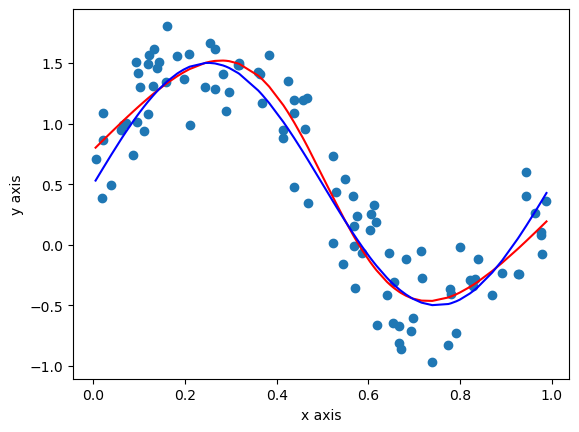

In [13]:
y_pred = model(x)
plt.plot(x, y_pred.data, color='red')
plt.plot(x, np.sin(2 * np.pi * x) + 0.5, color='blue')
plt.scatter(x, y)
plt.xlabel('x axis')
plt.ylabel('y axis')

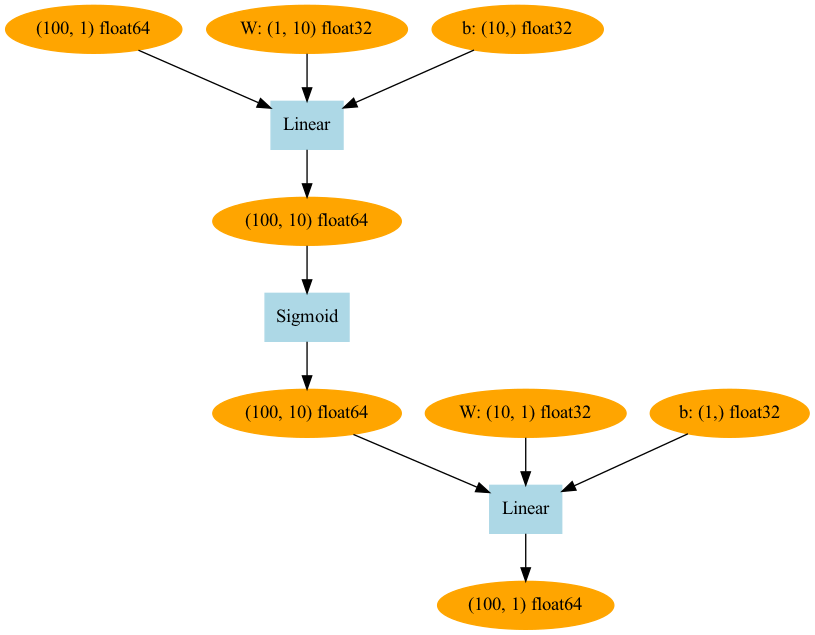

In [14]:
model.plot(x)

In [15]:
from adfp.model.models import MLP

np.random.seed(0)
x = np.sort(np.random.rand(100, 1), axis=0)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)


lr = 0.2
iters = 100
hidden_size = 10

model = MLP((10, 10, 1))

for i in range(iters):
    y_pred = model(x)
    loss = mean_square_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    for p in model.params:
        p.data -= lr * p.grad.data

    if i % 1000 == 0:
        print(f'iter: {i}, loss: {loss}')

iter: 0, loss: variable(0.8799221423958414)


Text(0, 0.5, 'y axis')

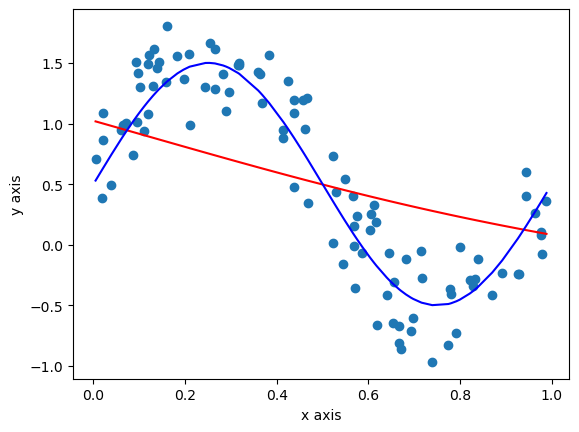

In [16]:
y_pred = model(x)
plt.plot(x, y_pred.data, color='red')
plt.plot(x, np.sin(2 * np.pi * x) + 0.5, color='blue')
plt.scatter(x, y)
plt.xlabel('x axis')
plt.ylabel('y axis')

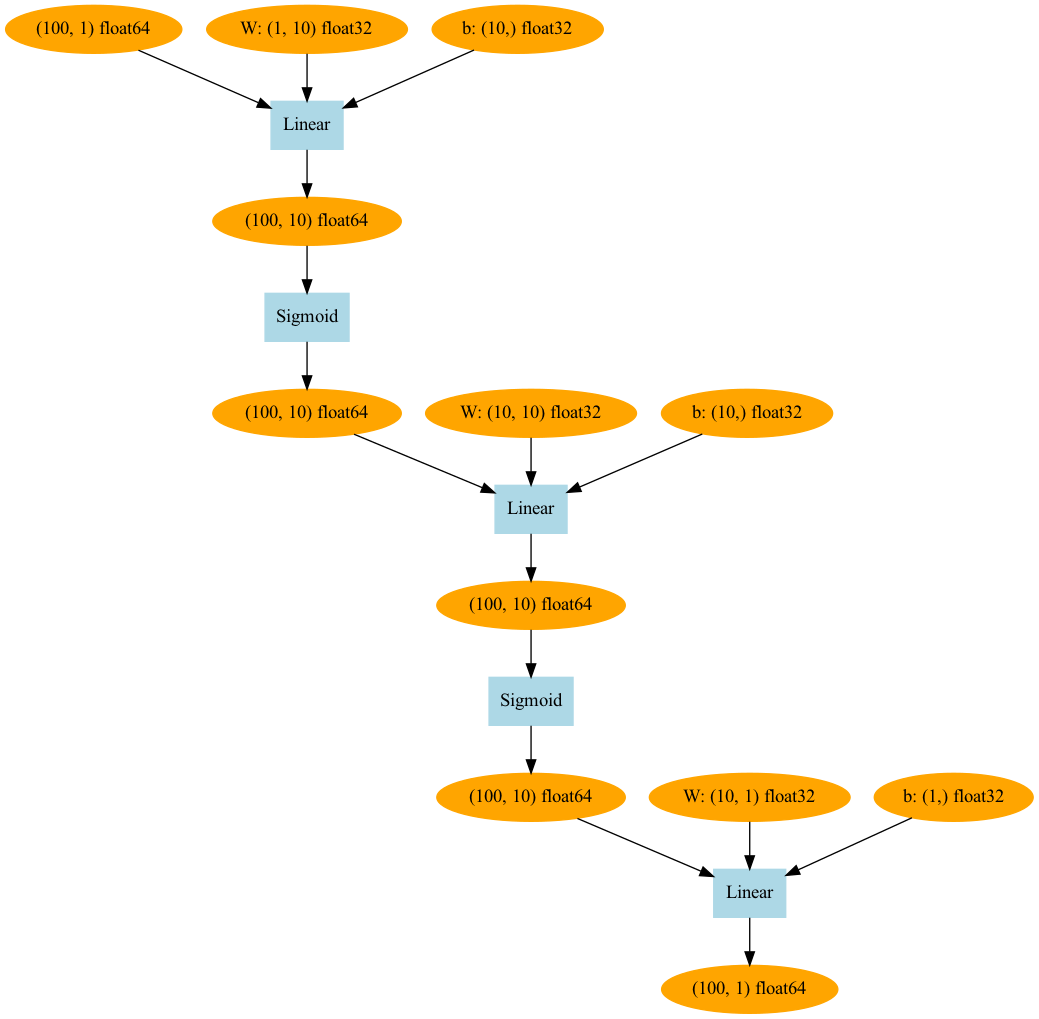

In [17]:
model.plot(x)

In [18]:
from adfp.model.models import TwoLayerNet
import adfp.model.optimizers as opt

np.random.seed(0)
x = np.sort(np.random.rand(100, 1), axis=0)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)


lr = 0.2
iters = 10000
hidden_size = 10

model = TwoLayerNet(hidden_size, 1)
optimizer = opt.SGD(lr)
optimizer.setup(model)


for i in range(iters):
    y_pred = model(x)
    loss = mean_square_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    optimizer.update()
    if i % 1000 == 0:
        print(f'iter: {i}, loss: {loss}')

iter: 0, loss: variable(0.8624304088340174)
iter: 1000, loss: variable(0.8624304088340174)
iter: 2000, loss: variable(0.8624304088340174)
iter: 3000, loss: variable(0.8624304088340174)
iter: 4000, loss: variable(0.8624304088340174)
iter: 5000, loss: variable(0.8624304088340174)
iter: 6000, loss: variable(0.8624304088340174)
iter: 7000, loss: variable(0.8624304088340174)
iter: 8000, loss: variable(0.8624304088340174)
iter: 9000, loss: variable(0.8624304088340174)


Text(0, 0.5, 'y axis')

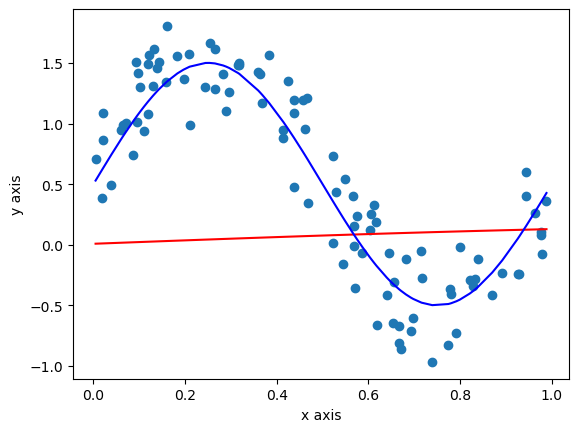

In [19]:
y_pred = model(x)
plt.plot(x, y_pred.data, color='red')
plt.plot(x, np.sin(2 * np.pi * x) + 0.5, color='blue')
plt.scatter(x, y)
plt.xlabel('x axis')
plt.ylabel('y axis')